### 2.1.1 Huberized Hinge loss

** Plot on a same plot, with different colors, the misclassification error loss, the (regular) hinge loss, and the huberized hinge loss.**

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

In [2]:
x = np.linspace(-2.0, 2.0, num=100)

In [3]:
def huberizedHingeLoss(x, h):
    if x > 1+h:
        return 0
    elif abs(1-x) <= h:
        return ((1+h-x)**2)/(4*h)
    else:
        return 1-x

def hingeLoss(x):
    return max([0, 1-x])

def misclassLoss(x):
    return 1 if x <= 0 else 0

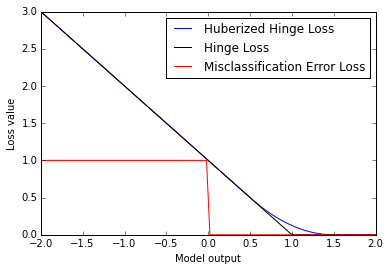

In [4]:
hub, = plt.plot(x, [huberizedHingeLoss(i, 0.5) for i in x], 'b-', label='Huberized Hinge Loss')
hinge, = plt.plot(x, [hingeLoss(i) for i in x], 'k-', label='Hinge Loss')
mis, = plt.plot(x, [misclassLoss(i) for i in x], 'r-', label='Misclassification Error Loss')
plt.legend(handles=[hub,hinge,mis], loc=0)
plt.ylabel('Loss value')
plt.xlabel('Model output')

** Explain how the huberized hinge loss relates to the regular hinge loss and to the misclassification error loss. **

Well, Huberized Hinge Loss is a smooth version of Hinge Loss that is differentiable everywhere. As can be seen in the plot, Hinge Loss and Huberized Hinge Loss give loss even when the function output is less than 1. Misclassification Error Loss only acts after the function output falls below 0.


**Write a mathematical proof that the huberized hinge loss is differentiable (hint: the huberized hinge loss is defined piecewise).**

Assuming yt = $x$ and function $f$ as the huberized hinge loss,

$$
f(x) = \left\{\begin{aligned}
&0 &: x > 1+h\\
&\frac{(1+h-x)^2}{4h} &: 1-h \leq x \leq 1+h\\
&1-x &: x < 1-h
\end{aligned}
\right.$$

Piecewise differentiation of $f$,

$$
f'(x) = \left\{\begin{aligned}
&0 &: x > 1+h\\
&-\frac{2(1+h-x)}{4h} &: 1-h \leq x \leq 1+h\\
&-1 &: x < 1-h
\end{aligned}
\right.$$

Clearly, $f$ is differentiable on each piece.

Let's check $f$'s differentiability on the kinks using $f'(x)$ $= \lim_{p\to x}\frac{f(p)}{p}$.

For $1+h$,
\begin{align}
f'(1+h) =& \lim_{p\to 1+h}\frac{f(p)}{p}
\end{align}
Right limit is,
\begin{align}
f'(1+h) =& \lim_{p\to (1+h)^+}\frac{0}{1+h}
= 0
\end{align}
Left limit is,
\begin{align}
f'(1+h) =& \lim_{p\to (1+h)^-}\frac{\frac{(1+h-(1+h))^2}{4h}}{1+h}
= 0
\end{align}

Clearly, Right limit = Left limit at $1+h$. Therefore, the function is differentiable at this point.

For $1-h$ right limit is,
\begin{align}
f'(1-h) =& \lim_{p\to (1-h)^+}\frac{\frac{(1+h-(1-h))^2}{4h}}{1-h} = \frac{h}{1-h} 
\end{align}
Left limit is,
\begin{align}
f'(1-h) =& \lim_{p\to (1-h)^-}\frac{1-(1-h)}{1-h} = \frac{h}{1-h} 
\end{align}

Clearly, Right limit = Left limit at $1-h$. Therefore, the function is differentiable at this point.

This proves that the function is differentiable at all points.

**Write the analytic expression(s) of the gradient of the huberized hinge loss. ** 

Analytic expression(s) of the gradient of the huberized hinge loss is,

$$
l_{huber-hinge}'(yt) = \left\{\begin{aligned}
&0 &: yt > 1+h\\
&-\frac{2(1+h-yt)}{4h} &: \left|1-yt\right| \leq h\\
&-1 &: yt < 1-h
\end{aligned}
\right.$$

**Is the gradient huberized hinge loss Lipschitz-continuous over a particular domain? (hint: the huberized hinge loss is defined piecewise). If the gradient huberized hinge loss is Lipschitz-continuous, write a mathematical proof. Then, give an upper-bound on the Lipschitz-continuous parameter L, and write the corresponding mathematical proof. If gradient huberized hinge loss is not Lipschitz-continuous, write a mathematical proof.**

Yes, huberized hinge loss is Lipschitz-continuous. 

To prove this, let's check if the absolute value of the derivative is limited by a particular $\rho$.

For cases 1 and 3 from Answer 2, the derivative is limited by 1 ($\left|-1\right| = 1$). 

For the second case, the function is linear in yt, so we only need to check the values at both ends of piece, $1-h$ and $1+h$.

\begin{align}
l'_{huber-hinge}(1+h) = -\frac{2(1+h-(1+h))}{4h} = 0
\end{align}

\begin{align}
l'_{huber-hinge}(1-h) = -\frac{2(1+h-(1-h))}{4h} = -\frac{4h}{4h} = -1
\end{align}

Clearly, this piece is also limited by 1.

Therefore, huberized hinge loss is 1-Lipschitz-continuous.

### 2.1.2 Analytic expressions

**Write a function compute_obj, to compute F(w) for a given w. Write a function compute_grad, to compute $\nabla_w F$ .**

In [5]:
def compute_obj(x, y, w, C=1.0, h=0.5):
    loss = np.vectorize(huberizedHingeLoss, excluded=['h'])
    return np.dot(w, w) + (C/float(x.shape[0]))*sum(loss(y*np.dot(x,w), h))

In [6]:
def compute_grad(x, y, w, C=1.0, h=0.5):
    p = y*np.dot(x, w)
    gradW = np.zeros(w.shape[0], dtype=float)
    
    def gradHuberHinge(i, j):
        if p[i] > 1+h:
            return 0
        elif abs(1-p[i]) <= h:
            return ((1+h-p[i])/(2*h))*(-y[i]*x[i][j])
        else:
            return (-y[i]*x[i][j])
        
    for j in range(w.shape[0]):
        sum_over_i = 0.0
        for i in range(x.shape[0]):
            sum_over_i += gradHuberHinge(i,j)
        gradW[j] = 2*w[j] + (C/float(x.shape[0]))*sum_over_i
    return gradW

In [7]:
def add_bias_column(x):
    return np.append(x, np.ones(x.shape[0]).reshape(x.shape[0],1), axis=1)

In [8]:
n_samples = 1000
n_features = 30
x, y = make_blobs(n_samples, n_features, centers=2)
y[y==0] = -1
x = add_bias_column(x)

In [9]:
w = np.zeros(n_features+1)

In [10]:
compute_obj(x, y, w)

1.0

In [11]:
compute_grad(x, y, w)

array([-4.26265896,  2.80803982,  0.09388749,  0.94673431, -4.56510148,
        2.92018346,  4.28997639, -6.93715379,  1.09227397,  0.05250879,
       -1.066922  ,  0.64409434, -2.4563554 , -0.02295888,  9.32239952,
        4.16132458,  5.10417525, -5.88244061,  4.78804416,  1.8422935 ,
        0.67297826,  0.77967799,  2.56123861,  4.41717849, -4.83195831,
        3.37086037,  1.21306787,  4.56657821,  3.99944089, -1.83955116,  0.        ])

### 2.1.3 Numerical checks

**Write a function grad_checker.**

In [12]:
def grad_checker(x, y, w, C=1.0, h=0.5, epsilon=1e-6):
    orig_grad = compute_grad(x, y, w, C, h)
    for i in range(w.shape[0]):
        wplus = np.copy(w)
        wneg = np.copy(w)
        wplus[i] += epsilon
        wneg[i] -= epsilon
        new_grad = (compute_obj(x, y, wplus, C, h) - compute_obj(x, y, wneg, C, h))/(2*epsilon)
        if abs(new_grad - orig_grad[i]) > epsilon:
            print "Fails at weight ", i
            print "gradient from input function ", orig_grad[i]
            print "gradient from approximation", new_grad
            return
    print "compute_grad is correct"

In [13]:
grad_checker(x,y,w)

compute_grad is correct


### 2.1.4 Gradient Descent

**Write a function ``my-gradient-descent`` that implements the gradient descent algorithm with a constant step-size η. The function is initialised at $w_0 = 0$. The function takes as input η and the maximum number of iterations maxiter. The function returns the output $w_T$ with T = maxiter.**

In [14]:
def my_gradient_descent(x, y, F, dF, eta=0.001, maxiter=1000):
    w = np.zeros(x.shape[1])
    for i in range(maxiter):
        w = w - eta*dF(x,y,w)
    return w

In [15]:
%time my_gradient_descent(x, y, compute_obj, compute_grad);

CPU times: user 51.6 s, sys: 164 ms, total: 51.8 s
Wall time: 51.6 s


array([  1.71387414e-02,  -1.27016942e-02,   1.25600508e-03,
        -3.79368173e-03,   1.72691480e-02,  -1.14025280e-02,
        -1.57234828e-02,   2.58702748e-02,  -2.77186727e-03,
        -2.52426023e-03,   3.80514469e-03,   1.90503619e-05,
         8.06794488e-03,  -2.95185891e-03,  -3.42465102e-02,
        -1.50054523e-02,  -1.88615930e-02,   2.14726358e-02,
        -1.69148348e-02,  -4.89645039e-03,  -3.52164352e-03,
        -4.48950219e-03,  -1.09813892e-02,  -1.60506592e-02,
         1.73489425e-02,  -1.13118407e-02,  -1.52756346e-03,
        -1.49296602e-02,  -1.57198231e-02,   6.05021348e-03,
         3.40627622e-04])

**Generate a synthetic data for binary classification. Each class is modelled as a Gaussian distribution, with 500 examples for training and 500 for testing. Make sure
the two classes have sufficient overlap.**

In [16]:
def dataset_fixed_cov(n,dim):
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((-np.ones(n), np.ones(n)))
    return X, y

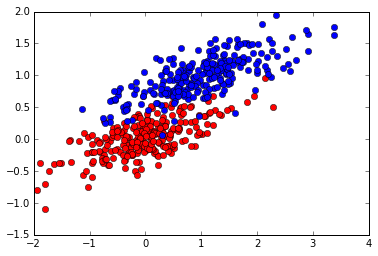

In [17]:
x_train,y_train = dataset_fixed_cov(250,2)
plt.plot(x_train[:250,0],x_train[:250,1], 'o', color='red')
plt.plot(x_train[250:,0],x_train[250:,1], 'o', color='blue')

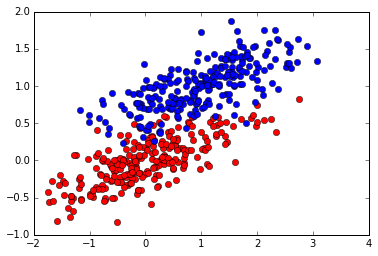

In [18]:
x_test,y_test = dataset_fixed_cov(250,2)
plt.plot(x_test[:250,0],x_test[:250,1], 'o', color='red')
plt.plot(x_test[250:,0],x_test[250:,1], 'o', color='blue')

**Normalize your data.**

In [19]:
scaler = preprocessing.StandardScaler().fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test);

**You will use here Linear SVM with huberized hinge loss, trained using your gradient descent algorithm. Write a function my-svm for Linear SVM, that can used for training (by calling my-gradient-descent) and testing.**

In [20]:
class my_svm(object):
    def __init__(self):
        self.learnt_w = None
        
    def fit(self, x_train, y_train, eta=0.01, max_iter=1000):
        x_copy = add_bias_column(x_train)
        self.learnt_w = my_gradient_descent(x_copy, y_train, compute_obj, compute_grad, eta, max_iter)
        
    def predict(self, x_test):
        x_copy = add_bias_column(x_test)
        y = np.dot(x_copy, self.learnt_w)
        y[y<0] = -1
        y[y>0] = 1
        return y
    
    def score(self, x_test, y_test):
        y_predict = self.predict(x_test)
        bools = y_predict == y_test
        accuracy = bools[bools == True].shape[0]/float(bools.shape[0])
        return accuracy

**Run experiments for various values of the fixed step-size η.**

In [21]:
svm = my_svm()
for k in range(0,9):    
    eta = 0.1**k
    svm.fit(x_train, y_train, eta)
    print eta, svm.score(x_test, y_test)

1.0 0.47
0.1 0.75
0.01 0.75
0.001 0.738
0.0001 0.738
1e-05 0.738
1e-06 0.738
1e-07 0.738
1e-08 0.738


**Visualise the linear separation learned by your Linear SVM**

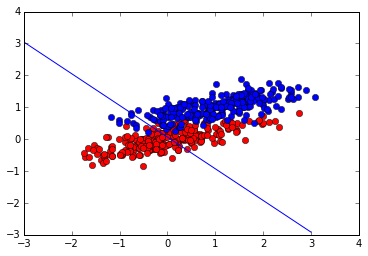

In [22]:
svm = my_svm()
svm.fit(x_train, y_train, 0.01)
line = svm.learnt_w
plt.plot(x_test[:250,0],x_test[:250,1], 'o', color='red')
plt.plot(x_test[250:,0],x_test[250:,1], 'o', color='blue')
xx = np.linspace(-3, 3)
yy = ((-line[0]/line[1])*xx)+(-line[2]/line[1]) # y = (-a/b)*x + (-c/b)
plt.plot(xx, yy)

**Plot the objective function vs the iterations, as the gradient
descent algorithm proceeds.**

In [23]:
def modified_gradient_descent(x, y, F, dF, eta=0.01, maxiter=1000):
    w = np.zeros(x.shape[1])
    F_vals = np.zeros(maxiter)
    for i in range(maxiter):
        w = w - eta*dF(x,y,w)
        F_vals[i] = F(x,y,w)
    return w, F_vals

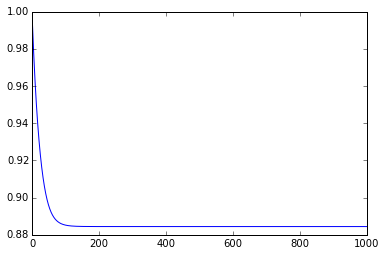

In [24]:
x_copy = add_bias_column(x_train)
_, F_vals = modified_gradient_descent(x_copy, y_train, compute_obj, compute_grad)
iterations = np.arange(1000)
plt.plot(iterations, F_vals)

**Implement backtracking line search (google it). Profile your
code, optimise in terms of speed. **

In [25]:
def backtracked_gradient_descent(x, y, F, dF, maxiter=100):
    w = np.zeros(x.shape[1])
    beta = 0.8
    F_vals = np.zeros(maxiter)
    for i in range(maxiter):
        eta = 1
        val = F(x,y,w)
        grad = dF(x,y,w)
        while F(x, y, (w - eta * grad)) > val - ((eta/2.) * grad.dot(grad)): 
            eta = beta * eta
        #print eta
        w = w - eta*grad
        F_vals[i] = F(x,y,w)
    return w, F_vals

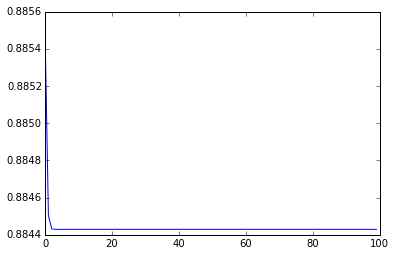

In [26]:
x_copy = add_bias_column(x_train)
_, F_vals = backtracked_gradient_descent(x_copy, y_train, compute_obj, compute_grad)
iterations = np.arange(100)
plt.plot(iterations, F_vals)

**Add several options to my-svm that allow the user to choose between the different stopping
criteria: i) maximum number of iterations; ii) optimization-based criterion.**

In [27]:
class my_svm(object):

    def huberizedHingeLoss(self, x, h):
        if x > 1+h:
            return 0
        elif abs(1-x) <= h:
            return ((1+h-x)**2)/(4*h)
        else:
            return 1-x
        
    def add_bias_column(self, x):
        return np.append(x, np.ones(x.shape[0]).reshape(x.shape[0],1), axis=1)
    
    def compute_obj(self, x, y, w, C=1.0, h=0.5):
        loss = np.vectorize(self.huberizedHingeLoss, excluded=['h'])
        return np.dot(w, w) + (C/float(x.shape[0]))*sum(loss(y*np.dot(x,w), h))

    def compute_grad(self, x, y, w, C=1.0, h=0.5):
        p = y*np.dot(x, w)
        gradW = np.zeros(w.shape[0], dtype=float)

        def gradHuberHinge(i, j):
            if p[i] > 1+h:
                return 0
            elif abs(1-p[i]) <= h:
                return ((1+h-p[i])/(2*h))*(-y[i]*x[i][j])
            else:
                return (-y[i]*x[i][j])

        for j in range(w.shape[0]):
            sum_over_i = 0.0
            for i in range(x.shape[0]):
                sum_over_i += gradHuberHinge(i,j)
            gradW[j] = 2*w[j] + (C/float(x.shape[0]))*sum_over_i
        return gradW

    def __init__(self, stop_criteria="iter", eta=0.01, max_iter=1000, epsilon=1e-3):
        self.learnt_w = None
        self.stop_criteria = stop_criteria
        self.eta = eta
        # i) maximum number of iterations
        self.max_iter = max_iter
        # ii) optimization-based criterion
        self.epsilon = epsilon
        
    def fit(self, x_train, y_train):
        x = self.add_bias_column(x_train)
        y = y_train
        w = np.zeros(x.shape[1])
        F = self.compute_obj
        dF = self.compute_grad
        if self.stop_criteria == "iter":
            for i in range(self.max_iter):
                #print w, self.eta * dF(x,y,w)     
                eta = 1
                val = F(x,y,w)
                grad = dF(x,y,w)
                while F(x, y, (w - eta * grad)) > val - ((eta/2.) * grad.dot(grad)): 
                    eta = beta * eta
                w = w - eta*grad
                w = w - self.eta * dF(x,y,w)    
        elif self.stop_criteria == "opt":
            grad = dF(x,y,w) 
            
            while np.sqrt(grad.dot(grad)) > self.epsilon:
                #print F(x,y,w)
                #print w, self.eta * dF(x,y,w)  
                w = w - self.eta * grad
                grad = dF(x,y,w)
        self.learnt_w = w
        
    def predict(self, x_test):
        x = self.add_bias_column(x_test)
        y = np.dot(x, self.learnt_w)
        y[y<0] = -1
        y[y>0] = 1
        return y
    
    def score(self, x_test, y_test):
        y_predict = self.predict(x_test)
        bools = y_predict == y_test
        accuracy = bools[bools == True].shape[0]/float(bools.shape[0])
        return accuracy

[-0.26734251  0.38592644 -0.00764976]


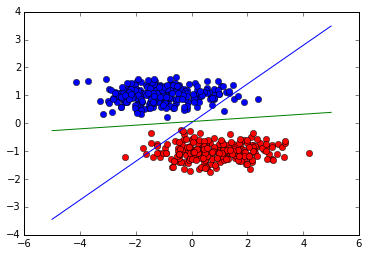

In [28]:
def dataset_fixed_cov(n,dim):
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    C = np.array([[-0.8, 0.2], [0.8, 0.2]])
    X = np.r_[np.dot(np.random.randn(n, dim), C) + np.array([1, -1]),
              np.dot(np.random.randn(n, dim), C) + np.array([-1, 1])]
    y = np.hstack((-np.ones(n), np.ones(n)))
    return X, y

x_train, y_train = dataset_fixed_cov(250,2)
x_test, y_test = dataset_fixed_cov(250,2)

scaler = preprocessing.StandardScaler().fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test);

plt.plot(x_train[:250,0], x_train[:250,1], 'o', color='red')
plt.plot(x_train[250:,0], x_train[250:,1], 'o', color='blue')

svm = my_svm(stop_criteria="opt")
svm.fit(x_train, y_train)
line = svm.learnt_w
print line

xx = np.linspace(-5, 5)
yy = ((-line[0]/line[1])*xx)+(-line[2]/line[1]) # y = (-a/b)*x + (-c/b)
plt.plot(xx, yy)


svm = LinearSVC()
svm.fit(x_train, y_train)
line = svm.coef_

xx = np.linspace(-5, 5)
yy = ((-svm.coef_[0][0]/svm.coef_[0][1])*xx)+(-svm.intercept_[0]/svm.coef_[0][1]) # y = (-a/b)*x + (-c/b)
plt.plot(xx, yy)


## 2.1.5 Stochastic Gradient Descent

**Write a function my-sgd that implements stochastic gradient, as described in the lecture slides.
The function is initialised at w_0 = 0. The function takes as input η_0 and t_0 and a stopping criterion along the same lines as for the regular gradient descent. Only the counterparts of stopping criteria
i) and iii) apply here. The function returns the last iterate w_T.**

In [29]:
def my_sgd(x, y, F, dF, eta=0.01, epochs=20):
    w = np.zeros(x.shape[1])
    for i in range(epochs):
        for j in range(x.shape[0]):
            grad = dF(x[j:j+1,:],y[j:j+1],w)
            w = w - eta*grad
    return w

In [30]:
x_train,y_train = dataset_fixed_cov(50000,2)

In [31]:
x_copy = add_bias_column(x_train)

In [33]:
%time sgd_w = my_sgd(x_copy, y_train, compute_obj, compute_grad)

CPU times: user 57.5 s, sys: 100 ms, total: 57.6 s
Wall time: 57.6 s
